In [ ]:
import deap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data = pd.read_csv('data_file.csv')


In [ ]:
data['x'] = data['x'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float) / 1e15
data['y'] = data['y'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float) / 1e15

In [ ]:
x = data['x']
y = data['y']
data_list = list(zip(x, y))
data.shape
data.head()


,x,y
0,-5.000000e-14,-9.267629
1,-4.900000e-14,-6.600302
2,-4.800000e+00,-6.900386
3,-4.700000e+00,-31.915151
4,-4.600000e+00,-6.643456


In [ ]:
print("Max x değeri:", data["x"].max(), "\t Min x değeri:", data["x"].min())
print("Max y değeri:", data["y"].max(), "\t Min y değeri:", data["y"].min())

Max x değeri: 49.999999999998 	 Min x değeri: -43.0
Max y değeri: 53.0742276167026 	 Min y değeri: -70.54638963568


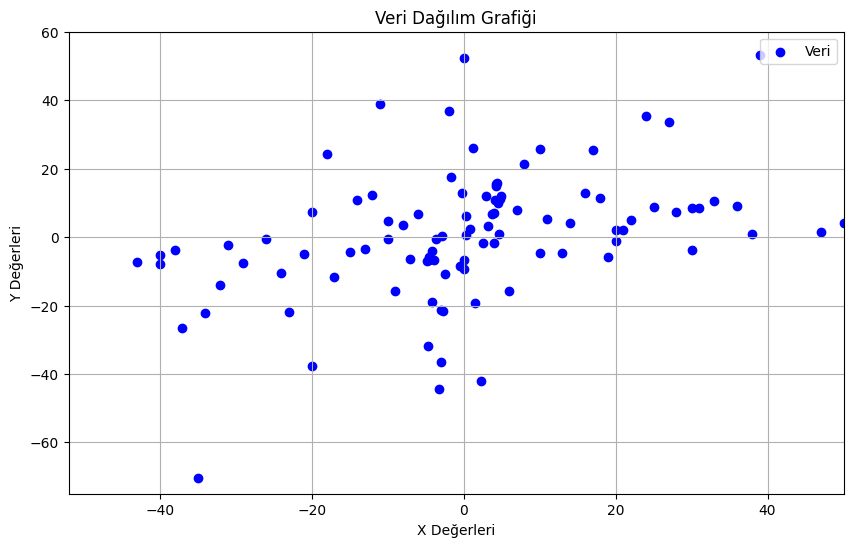

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Veri')

plt.title('Veri Dağılım Grafiği')
plt.xlabel('X Değerleri')
plt.ylabel('Y Değerleri')
plt.xlim(-52, 50)
plt.ylim(-75, 60)
plt.legend()

plt.grid(True)
plt.show()

GA ile en uygun ax+b doğrusunu

In [ ]:
import random
import numpy as np

random.seed(42)
np.random.seed(42)

def fitness_ga(params, data):
    a, b = params
    error = 0
    for x_val, y_val in data:
        y_pred = a * x_val + b
        error += (y_val - y_pred) ** 2
    return error / len(data)

def create_individual():
    return [random.uniform(-10, 10) for _ in range(2)]

def create_population(pop_size):
    return [create_individual() for _ in range(pop_size)]

def tournament_selection(population, fitnesses, k=40):
    selected = random.sample(list(zip(population, fitnesses)), k)
    selected.sort(key=lambda ind_fit: ind_fit[1])
    return selected[0][0]

def crossover(parent1, parent2, alpha=0.5):
    child1 = [alpha * p1 + (1 - alpha) * p2 for p1, p2 in zip(parent1, parent2)]
    child2 = [(1 - alpha) * p1 + alpha * p2 for p1, p2 in zip(parent1, parent2)]
    return child1, child2

def mutate(individual, mu=0, sigma=1, indpb=0.1):
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)
    return individual

In [ ]:
best_fitness_values = []

def genetic_algorithm(data, pop_size=200, generations=40, cxpb=0.5, mutpb=0.2, indpb=0.1):
    population = create_population(pop_size)
    best_individual = None
    best_fitness = float('inf')

    for generation in range(generations):
        fitnesses = [fitness_ga(individual, data) for individual in population]

        new_population = []
        for _ in range(pop_size // 2):
            parent1 = tournament_selection(population, fitnesses, k=40)
            parent2 = tournament_selection(population, fitnesses, k=40)
            child1, child2 = crossover(parent1, parent2, alpha=0.5)
            new_population.append(mutate(child1, indpb=indpb))
            new_population.append(mutate(child2, indpb=indpb))

        population = new_population

        current_best_fitness = min(fitnesses)
        current_best_individual = population[fitnesses.index(current_best_fitness)]

        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_individual = current_best_individual

        best_fitness_values.append(best_fitness)
        print(f"Generation {generation}: Best Fitness = {best_fitness}")

    return best_individual, best_fitness

best_params_ga, best_fitness = genetic_algorithm(data_list, cxpb=0.5, mutpb=0.2, indpb=0.1)
print("En iyi parametreler (GA):", best_params_ga)
print("En iyi fitness değeri (GA):", best_fitness)

Generation 0: Best Fitness = 294.1768519217132
Generation 1: Best Fitness = 292.3429765687576
Generation 2: Best Fitness = 291.19314372088263
Generation 3: Best Fitness = 291.1171492345045
Generation 4: Best Fitness = 291.1171492345045
Generation 5: Best Fitness = 291.11684151834817
Generation 6: Best Fitness = 291.11684151834817
Generation 7: Best Fitness = 291.1163958161241
Generation 8: Best Fitness = 291.1162276141679
Generation 9: Best Fitness = 291.1162276141679
Generation 10: Best Fitness = 291.1162276141679
Generation 11: Best Fitness = 291.1162276141679
Generation 12: Best Fitness = 291.1162276141679
Generation 13: Best Fitness = 291.1162276141679
Generation 14: Best Fitness = 291.1162276141679
Generation 15: Best Fitness = 291.1162276141679
Generation 16: Best Fitness = 291.1162276141679
Generation 17: Best Fitness = 291.1162276141679
Generation 18: Best Fitness = 291.1101839965811
Generation 19: Best Fitness = 291.1101839965811
Generation 20: Best Fitness = 291.1101839965811

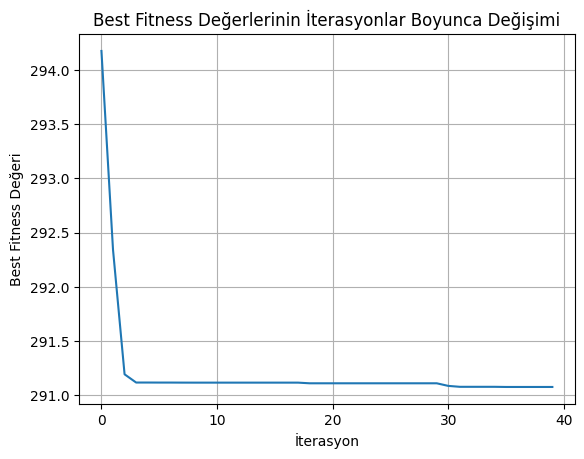

In [ ]:
plt.plot(best_fitness_values)
plt.title('Best Fitness Değerlerinin İterasyonlar Boyunca Değişimi')
plt.xlabel('İterasyon')
plt.ylabel('Best Fitness Değeri')
plt.xticks(np.arange(0, 50, 10))
plt.grid(True)
plt.show()

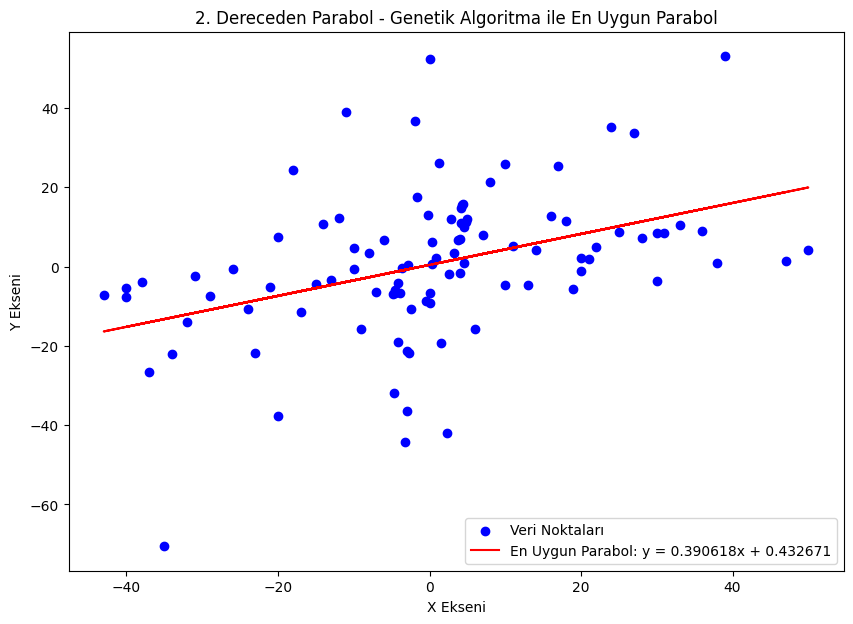

In [ ]:
y_fit = best_params_ga[0] * x + best_params_ga[1]

fig = plt.figure(figsize=(10, 7))
plt.scatter(x, y, color='blue', label='Veri Noktaları')
plt.plot(x, y_fit, color='red',
         label=f'En Uygun Parabol: y = {best_params_ga[0]:.6f}x + {best_params_ga[1]:.6f}')
plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')
plt.title(' Genetik Algoritma ile En Uygun Doğru')
plt.legend()
plt.show()

GA ile 2. dereceden kübik Parabol eğrisi ile oluşan en iyi parametreler

In [ ]:
import random
import numpy as np

random.seed(42)
np.random.seed(42)

def fitness_ga(params, data):
    a, b, c = params
    error = 0
    for x_val, y_val in data:
        y_pred = a * x_val**2 + b * x_val + c
        error += (y_val - y_pred) ** 2
    return error / len(data)

def create_individual():
    return [random.uniform(-10, 10) for _ in range(3)]

def create_population(pop_size):
    return [create_individual() for _ in range(pop_size)]

def tournament_selection(population, fitnesses, k=40):
    selected = random.sample(list(zip(population, fitnesses)), k)
    selected.sort(key=lambda ind_fit: ind_fit[1])
    return selected[0][0]

def crossover(parent1, parent2, alpha=0.5):
    child1 = [alpha * p1 + (1 - alpha) * p2 for p1, p2 in zip(parent1, parent2)]
    child2 = [(1 - alpha) * p1 + alpha * p2 for p1, p2 in zip(parent1, parent2)]
    return child1, child2

def mutate(individual, mu=0, sigma=1, indpb=0.1):
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)
    return individual

In [ ]:
best_fitness_values = []

def genetic_algorithm(data, pop_size=200, generations=40, cxpb=0.5, mutpb=0.2, indpb=0.1):
    population = create_population(pop_size)
    best_individual = None
    best_fitness = float('inf')

    for generation in range(generations):
        fitnesses = [fitness_ga(individual, data) for individual in population]

        new_population = []
        for _ in range(pop_size // 2):
            parent1 = tournament_selection(population, fitnesses, k=40)
            parent2 = tournament_selection(population, fitnesses, k=40)
            child1, child2 = crossover(parent1, parent2, alpha=0.5)
            new_population.append(mutate(child1, indpb=indpb))
            new_population.append(mutate(child2, indpb=indpb))

        population = new_population

        current_best_fitness = min(fitnesses)
        current_best_individual = population[fitnesses.index(current_best_fitness)]

        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_individual = current_best_individual

        best_fitness_values.append(best_fitness)
        print(f"Generation {generation}: Best Fitness = {best_fitness}")

    return best_individual, best_fitness

best_params_ga, best_fitness = genetic_algorithm(data_list, cxpb=0.5, mutpb=0.2, indpb=0.1)
print("En iyi parametreler (GA):", best_params_ga)
print("En iyi fitness değeri (GA):", best_fitness)

Generation 0: Best Fitness = 19956.582005412372
Generation 1: Best Fitness = 3743.9882354806455
Generation 2: Best Fitness = 324.5044603652044
Generation 3: Best Fitness = 300.3050079820387
Generation 4: Best Fitness = 292.21643040668226
Generation 5: Best Fitness = 289.85502680421894
Generation 6: Best Fitness = 289.4675808884467
Generation 7: Best Fitness = 289.4675808884467
Generation 8: Best Fitness = 289.4675808884467
Generation 9: Best Fitness = 289.4675808884467
Generation 10: Best Fitness = 289.46737025722655
Generation 11: Best Fitness = 289.46736034211887
Generation 12: Best Fitness = 289.46736034211887
Generation 13: Best Fitness = 289.4129765242885
Generation 14: Best Fitness = 289.4129765242885
Generation 15: Best Fitness = 289.4129765242885
Generation 16: Best Fitness = 289.4129765242885
Generation 17: Best Fitness = 289.4129765242885
Generation 18: Best Fitness = 289.4129765242885
Generation 19: Best Fitness = 289.41297444871975
Generation 20: Best Fitness = 289.41297426

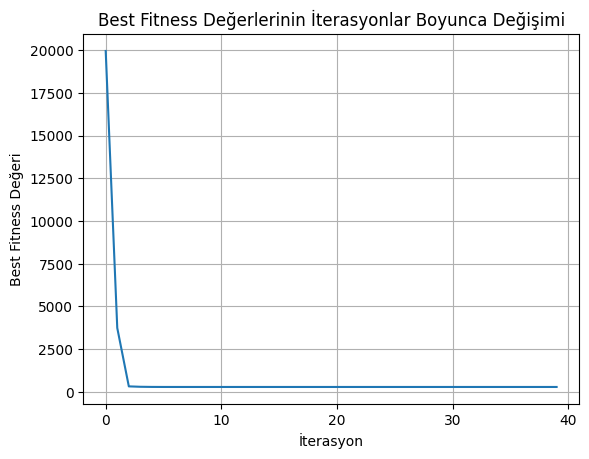

In [ ]:
plt.plot(best_fitness_values)
plt.title('Best Fitness Değerlerinin İterasyonlar Boyunca Değişimi')
plt.xlabel('İterasyon')
plt.ylabel('Best Fitness Değeri')
plt.xticks(np.arange(0, 50, 10))
plt.grid(True)
plt.show()

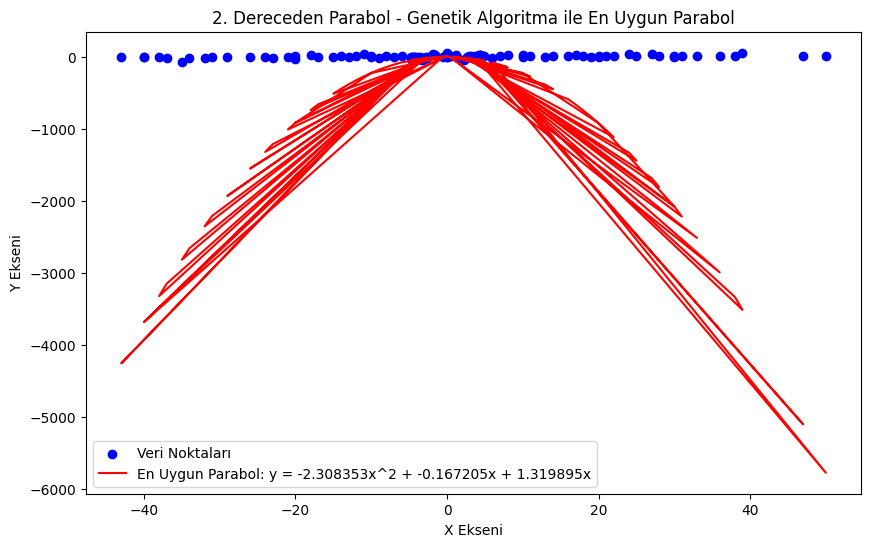

In [ ]:
y_fit = best_params_ga[0] * x**2 + best_params_ga[1] * x + best_params_ga[2]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Veri Noktaları')
plt.plot(x, y_fit, color='red',
         label=f'En Uygun Parabol: y = {best_params_ga[0]:.6f}x^2 + {best_params_ga[1]:.6f}x + {best_params_ga[2]:.6f}x')
plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')
plt.title('2. Dereceden Parabol - Genetik Algoritma ile En Uygun Parabol')
plt.legend()
plt.show()

GA ile 3. dereceden kübik Parabol eğrisi ile oluşan en iyi parametreler

In [ ]:
import random

random.seed(42)
np.random.seed(42)

def fitness_ga(params, data):
    a, b, c, d = params
    error = 0
    for x_val, y_val in data:
        y_pred = a * x_val**3 + b * x_val**2 + c * x_val + d
        error += (y_val - y_pred) ** 2
    return error / len(data)

def create_individual():
    return [random.uniform(-10,10) for _ in range(4)]

def create_population(pop_size):
    return [create_individual() for _ in range(pop_size)]

def tournament_selection(population, fitnesses, k=40):
    selected = random.sample(list(zip(population, fitnesses)), k)
    selected.sort(key=lambda ind_fit: ind_fit[1])
    return selected[0][0]

def crossover(parent1, parent2, alpha=0.5):
    child1 = [alpha * p1 + (1 - alpha) * p2 for p1, p2 in zip(parent1, parent2)]
    child2 = [(1 - alpha) * p1 + alpha * p2 for p1, p2 in zip(parent1, parent2)]
    return child1, child2

def mutate(individual, mu=0, sigma=1, indpb=0.1):
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)
    return individual


In [ ]:
best_fitness_values = []

def genetic_algorithm(data, pop_size=200, generations=40, cxpb=0.5, mutpb=0.2, indpb=0.1):
    population = create_population(pop_size)
    best_individual = None
    best_fitness = float('inf')

    for generation in range(generations):
        fitnesses = [fitness_ga(individual, data) for individual in population]

        new_population = []
        for _ in range(pop_size // 2):
            parent1 = tournament_selection(population, fitnesses, k=40)
            parent2 = tournament_selection(population, fitnesses, k=40)
            child1, child2 = crossover(parent1, parent2, alpha=0.5)
            new_population.append(mutate(child1, indpb=indpb))
            new_population.append(mutate(child2, indpb=indpb))

        population = new_population

        current_best_fitness = min(fitnesses)
        current_best_individual = population[fitnesses.index(current_best_fitness)]

        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_individual = current_best_individual

        best_fitness_values.append(best_fitness)
        print(f"Generation {generation}: Best Fitness = {best_fitness}")

    return best_individual, best_fitness

best_params_ga, best_fitness = genetic_algorithm(data_list, cxpb=0.5, mutpb=0.2, indpb=0.1)
print("En iyi parametreler (GA):", best_params_ga)
print("En iyi fitness değeri (GA):", best_fitness)

Generation 0: Best Fitness = 17912588.56272566
Generation 1: Best Fitness = 4690332.06589852
Generation 2: Best Fitness = 276653.10940472415
Generation 3: Best Fitness = 4445.742699929082
Generation 4: Best Fitness = 2039.942893827672
Generation 5: Best Fitness = 1572.1063777523125
Generation 6: Best Fitness = 851.4163256937452
Generation 7: Best Fitness = 390.43079203402334
Generation 8: Best Fitness = 318.10170902888217
Generation 9: Best Fitness = 300.12283519343947
Generation 10: Best Fitness = 291.51905845078386
Generation 11: Best Fitness = 291.466028363571
Generation 12: Best Fitness = 291.44755162316784
Generation 13: Best Fitness = 291.26738900426864
Generation 14: Best Fitness = 291.26738900426864
Generation 15: Best Fitness = 290.68333534131574
Generation 16: Best Fitness = 290.68333534131574
Generation 17: Best Fitness = 290.68292551340755
Generation 18: Best Fitness = 290.6826706304661
Generation 19: Best Fitness = 290.1776746107346
Generation 20: Best Fitness = 289.695218

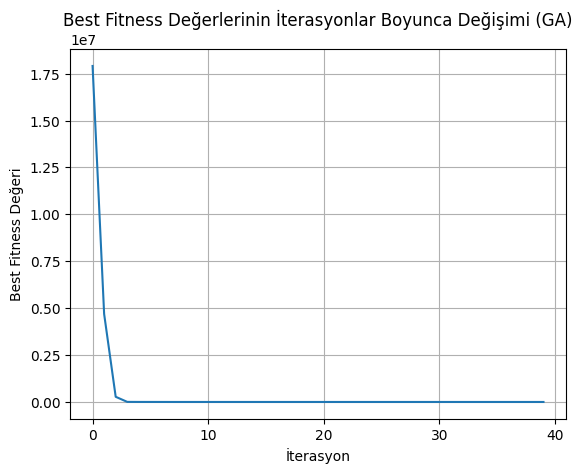

In [ ]:
plt.plot(best_fitness_values)
plt.title('Best Fitness Değerlerinin İterasyonlar Boyunca Değişimi (GA)')
plt.xlabel('İterasyon')
plt.ylabel('Best Fitness Değeri')
plt.xticks(np.arange(0, 50, 10))
plt.grid(True)
plt.show()

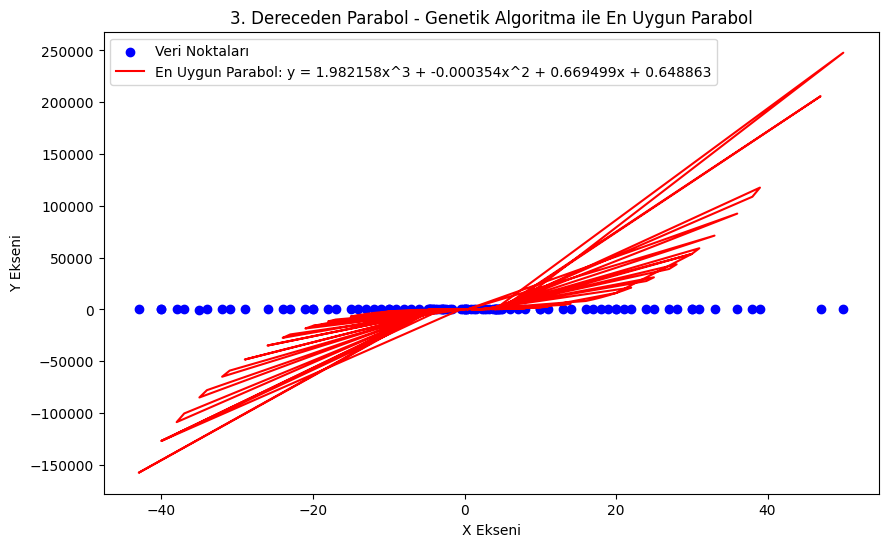

In [ ]:
y_fit = best_params_ga[0] * x**3 + best_params_ga[1] * x**2 + best_params_ga[2] * x + best_params_ga[3]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Veri Noktaları')
plt.plot(x, y_fit, color='red',
         label=f'En Uygun Parabol: y = {best_params_ga[0]:.6f}x^3 + {best_params_ga[1]:.6f}x^2 + {best_params_ga[2]:.6f}x + {best_params_ga[3]:.6f}')
plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')
plt.title('3. Dereceden Parabol - Genetik Algoritma ile En Uygun Parabol')
plt.legend()
plt.show()

GA ile 4. dereceden kübik Parabol eğrisi ile oluşan en iyi parametreler

In [ ]:
import random
import numpy as np

random.seed(42)
np.random.seed(42)

def fitness_ga(params, data):
    a, b, c, d, e = params
    error = 0
    for x_val, y_val in data:
        y_pred = a * x_val**4 + b * x_val**3 + c * x_val**2 + d * x_val + e
        error += (y_val - y_pred) ** 2
    return error / len(data)

def create_individual():
    return [random.uniform(-10, 10) for _ in range(5)]

def create_population(pop_size):
    return [create_individual() for _ in range(pop_size)]

def tournament_selection(population, fitnesses, k=40):
    selected = random.sample(list(zip(population, fitnesses)), k)
    selected.sort(key=lambda ind_fit: ind_fit[1])
    return selected[0][0]

def crossover(parent1, parent2, alpha=0.5):
    child1 = [alpha * p1 + (1 - alpha) * p2 for p1, p2 in zip(parent1, parent2)]
    child2 = [(1 - alpha) * p1 + alpha * p2 for p1, p2 in zip(parent1, parent2)]
    return child1, child2

def mutate(individual, mu=0, sigma=1, indpb=0.1):
    for i in range(len(individual)):
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)
    return individual

In [ ]:
best_fitness_values = []

def genetic_algorithm(data, pop_size=200, generations=40, cxpb=0.5, mutpb=0.2, indpb=0.1):
    population = create_population(pop_size)
    best_individual = None
    best_fitness = float('inf')

    for generation in range(generations):
        fitnesses = [fitness_ga(individual, data) for individual in population]

        new_population = []
        for _ in range(pop_size // 2):
            parent1 = tournament_selection(population, fitnesses, k=40)
            parent2 = tournament_selection(population, fitnesses, k=40)
            child1, child2 = crossover(parent1, parent2, alpha=0.5)
            new_population.append(mutate(child1, indpb=indpb))
            new_population.append(mutate(child2, indpb=indpb))

        population = new_population

        current_best_fitness = min(fitnesses)
        current_best_individual = population[fitnesses.index(current_best_fitness)]

        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_individual = current_best_individual

        best_fitness_values.append(best_fitness)
        print(f"Generation {generation}: Best Fitness = {best_fitness}")

    return best_individual, best_fitness

best_params_ga, best_fitness = genetic_algorithm(data_list, cxpb=0.5, mutpb=0.2, indpb=0.1)
print("En iyi parametreler (GA):", best_params_ga)
print("En iyi fitness değeri (GA):", best_fitness)

Generation 0: Best Fitness = 41565112983.93904
Generation 1: Best Fitness = 478995681.7521784
Generation 2: Best Fitness = 439593632.87592804
Generation 3: Best Fitness = 49408174.85210569
Generation 4: Best Fitness = 13487093.471379714
Generation 5: Best Fitness = 4967028.217508539
Generation 6: Best Fitness = 2203307.755290411
Generation 7: Best Fitness = 1282762.3328985155
Generation 8: Best Fitness = 891915.4148277104
Generation 9: Best Fitness = 462110.14470533177
Generation 10: Best Fitness = 252807.30632414456
Generation 11: Best Fitness = 242993.83960095784
Generation 12: Best Fitness = 232407.2292332266
Generation 13: Best Fitness = 227128.47731201843
Generation 14: Best Fitness = 216842.2935368851
Generation 15: Best Fitness = 209202.60780002494
Generation 16: Best Fitness = 207812.531100168
Generation 17: Best Fitness = 193015.0248815682
Generation 18: Best Fitness = 142407.4097957095
Generation 19: Best Fitness = 139723.657447218
Generation 20: Best Fitness = 136675.2202341

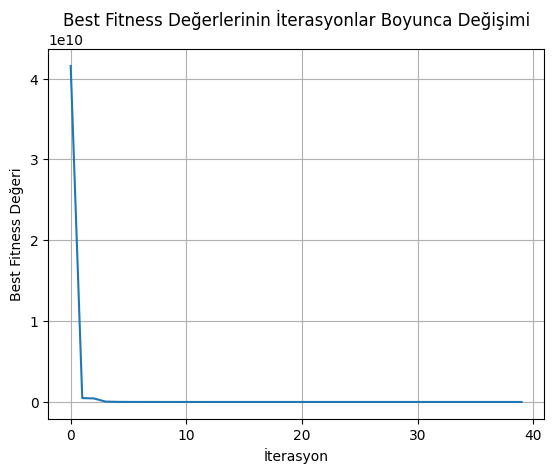

In [ ]:
plt.plot(best_fitness_values)
plt.title('Best Fitness Değerlerinin İterasyonlar Boyunca Değişimi')
plt.xlabel('İterasyon')
plt.ylabel('Best Fitness Değeri')
plt.xticks(np.arange(0, 50, 10))
plt.grid(True)
plt.show()

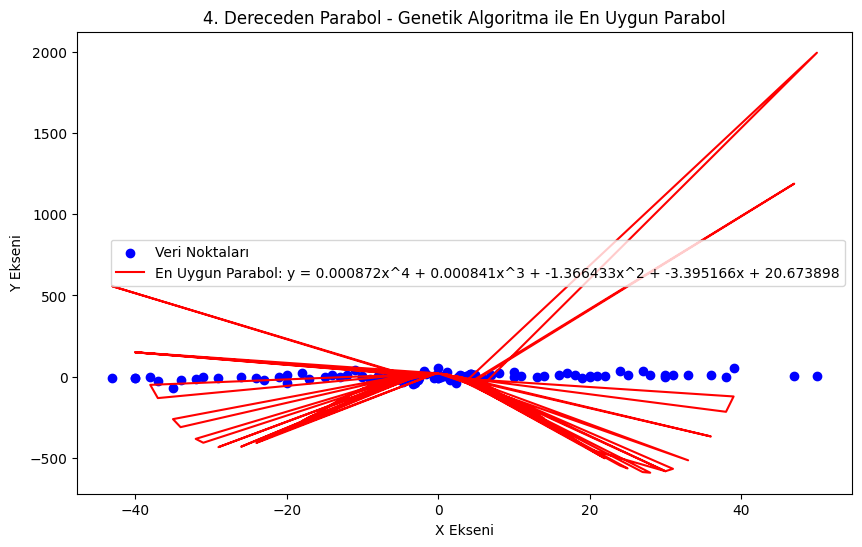

In [ ]:
y_fit = best_params_ga[0] * x**4 + best_params_ga[1] * x**3 + best_params_ga[2] * x**2 + best_params_ga[3] * x + best_params_ga[4]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Veri Noktaları')
plt.plot(x, y_fit, color='red',
         label=f'En Uygun Parabol: y = {best_params_ga[0]:.6f}x^4 + {best_params_ga[1]:.6f}x^3 + {best_params_ga[2]:.6f}x^2 + {best_params_ga[3]:.6f}x + {best_params_ga[4]:.6f}')
plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')
plt.title('4. Dereceden Parabol - Genetik Algoritma ile En Uygun Parabol')
plt.legend()
plt.show()

In [ ]:
pip install deap

In [ ]:
data_list

[(-5e-14, -9.26762937441587),
 (-4.9e-14, -6.60030238008205),
 (-4.8, -6.90038614361324),
 (-4.7, -31.9151506724663),
 (-4.6, -6.64345584736646),
 (-4.5, -5.94579028319621),
 (-4.4, -6.40763999473161),
 (-43.0, -7.19188172718684),
 (-4.2, -4.08498300978444),
 (-4.1, -18.9598464512141),
 (-40.0, -7.72962828223764),
 (-3.9, -6.76248236411324),
 (-38.0, -3.86522526093072),
 (-37.0, -26.6882292960294),
 (-3.6, -0.451997392619973),
 (-35.0, -70.54638963568),
 (-34.0, -22.0652483598325),
 (-3.3, -44.3525611919292),
 (-32.0, -14.0662032113546),
 (-31.0, -2.44635124075955),
 (-3.0, -21.247762908396),
 (-29.0, -7.5129807793316),
 (-2.8, 0.340278357167623),
 (-2.7, -21.7070220228103),
 (-26.0, -0.697636105010567),
 (-2.5, -10.7503128926083),
 (-24.0, -10.6288472840979),
 (-23.0, -21.8805180319799),
 (-0.220000000000001, 12.9684829389265),
 (-21.0000000000001, -5.04834538782007),
 (-20.0000000000001, 7.34609922165241),
 (-1.90000000000001, 36.820555821539905),
 (-18.0000000000001, 24.308617217475

In [ ]:
import numpy as np
from deap import base, creator, tools, algorithms
import random

random.seed(42)
np.random.seed(42)

def fitness_function(individual):
    predicted_y = np.polyval(individual, x)
    return -np.mean((predicted_y - y) ** 2),


creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -10, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=4)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def main(data_list):
    population = toolbox.population(n=200)
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)
    best_individual = tools.selBest(population, k=40)[0]
    best_fitness = fitness_function(best_individual)
    return best_individual,best_fitness

best_params_deap,best_fitness = main(data_list)
print("En iyi parametreler (DEAP GA):", best_params_deap)
print("En iyi fitness değeri (DEAP GA):", best_fitness)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


En iyi parametreler (DEAP GA): [-5.80220358e-05 -2.02694153e-03  4.50152657e-01  9.20544769e-01]
En iyi fitness değeri (DEAP GA): (-287.97116622739327,)


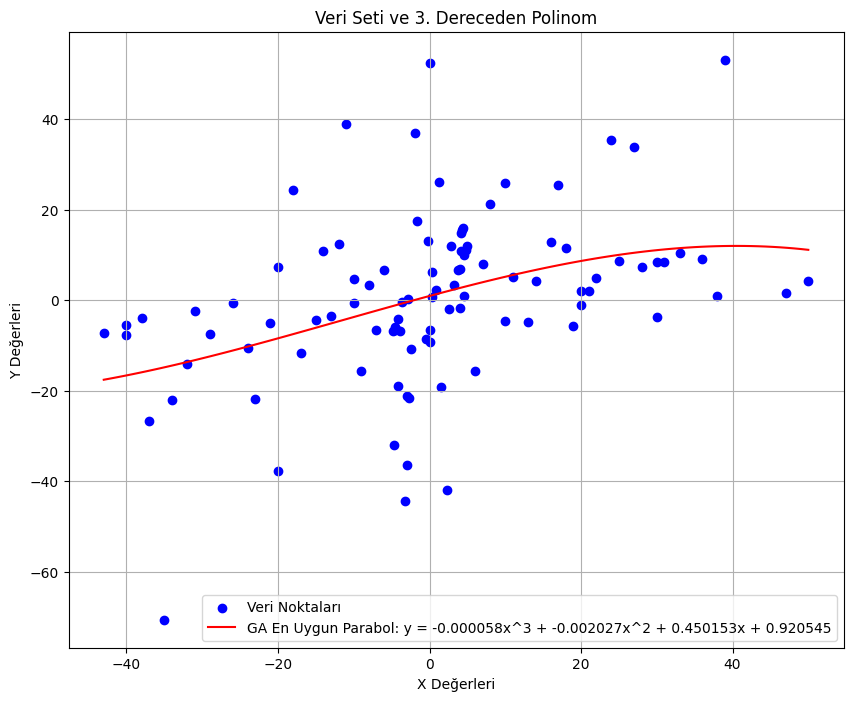

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = data['x']
y_data = data['y']

a, b, c, d = best_params_deap

def func(x):
    return a * x**3 + b * x**2 + c * x + d

y_poly = func(x_data)
fig = plt.figure(figsize=(10, 8))
plt.scatter(x_data, y_data, color='blue', label='Veri Noktaları')

x_range = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x_range, func(x_range), color='red', label= f'GA En Uygun Parabol: y = {a:.6f}x^3 + {b:.6f}x^2 + {c:.6f}x + {d:.6f}')

plt.xlabel('X Değerleri')
plt.ylabel('Y Değerleri')
plt.title('Veri Seti ve 3. Dereceden Polinom')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from deap import base, creator, tools, algorithms
import random

random.seed(42)
np.random.seed(42)

def fitness_function(individual):
    predicted_y = np.polyval(individual, x)
    return -np.mean((predicted_y - y) ** 2),

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -7, 7)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=5)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def main(data_list):
    population = toolbox.population(n=200)
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)
    best_individual = tools.selBest(population, k=1)[0]
    best_fitness = fitness_function(best_individual)
    return best_individual, best_fitness

best_params_deap, best_fitness = main(data_list)
print("En iyi parametreler (DEAP GA):", best_params_deap)
print("En iyi fitness değeri (DEAP GA):", best_fitness)

En iyi parametreler (DEAP GA): [ 6.72559485e-06 -9.50857190e-06 -1.37671578e-02  3.53379587e-01
  3.98674185e+00]
En iyi fitness değeri (DEAP GA): (-301.7732872095452,)


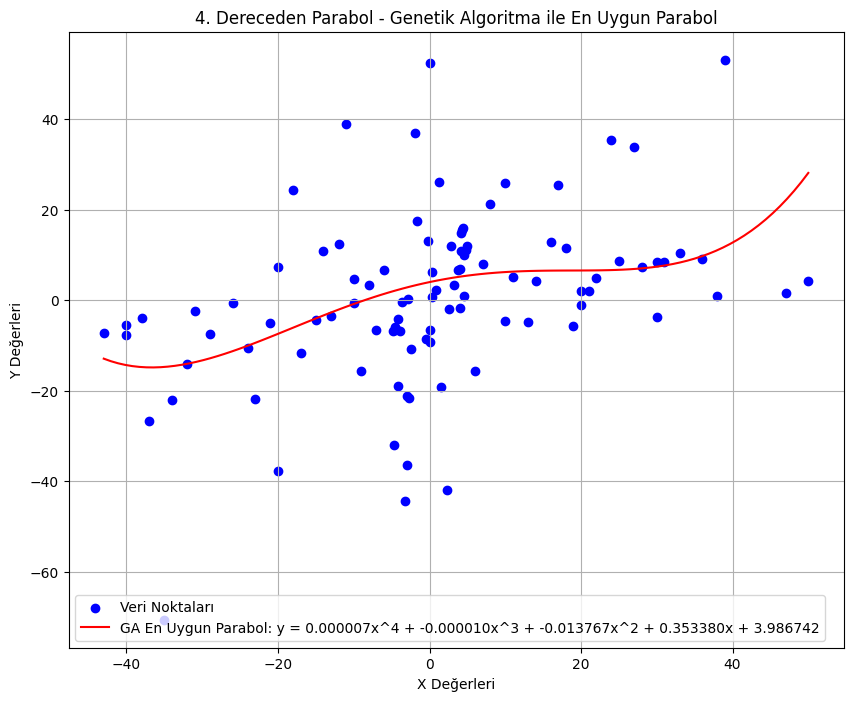

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = data['x']
y_data = data['y']

a, b, c, d, e = best_params_deap

def func(x):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

y_poly = func(x_data)

fig = plt.figure(figsize=(10, 8))
plt.scatter(x_data, y_data, color='blue', label='Veri Noktaları')

x_range = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x_range, func(x_range), color='red', label= f'GA En Uygun Parabol: y = {a:.6f}x^4 + {b:.6f}x^3 + {c:.6f}x^2 + {d:.6f}x + {e:.6f}')

plt.xlabel('X Değerleri')
plt.ylabel('Y Değerleri')

plt.title('4. Dereceden Parabol - Genetik Algoritma ile En Uygun Parabol')
plt.legend()
plt.grid(True)
plt.show()